In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import odeint

In [2]:
def neutronAbundance(mp, mn, Xn0, etaB):
    Q= mn-mp   # MeV
    tauN = 886.7  # sec; neturon lifetime
    
    def H1(Q, gstar= 10.75): # based on Dod Eq. 3.28
        DodQ= 1.293
        G=  1.13**2*45./(4*np.pi**3.*gstar*DodQ**4)
        return np.sqrt(4.*np.pi**3*G*Q**4/45.)*np.sqrt(gstar) 

    def lambda_NP(x):
        return (255./(tauN*x**5.))*(12. + 6.*x + x**2.) # Dod Eq. 3.29
        
    #print lambda_NP(1)
    def dXndx(Xn, x, gstar= 10.75):
        factor= x*lambda_NP(x)*(mp/mn)**(3./2.)/H1(Q, gstar= gstar)
        #factor= x*lambdaNP(x)/H1(Q, gstar= gstar)
        dXndx = factor*(np.exp(-x) - Xn*(1. + np.exp(-x)))
        return dXndx
    
    # plot T vs. Xn
    T = np.logspace(0,-3, 100)
    x= Q/T
    result = odeint(dXndx, Xn0, x, args= (10.75,))
    plt.plot(T, result[:,0], 'o', color='b', label= 'X_n')
    plt.plot(T, result[:,0], color='b')

    
    Xeq= 1/(1+np.exp(Q/T))
    plt.plot(T, 2.*Xeq, 'o', color='g', label= '2*X_n_EQ')
    plt.plot(T, 2.*Xeq, color='g')

    plt.gca().invert_xaxis()
    plt.xlim(1.3, 0.0005)
    plt.ylim(10**-5, 10**0)
    plt.xlabel('T (MeV)')
    plt.ylabel('Fractional Abundance')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc= "best")
    plt.show()

/Users/Humna/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: overflow encountered in exp


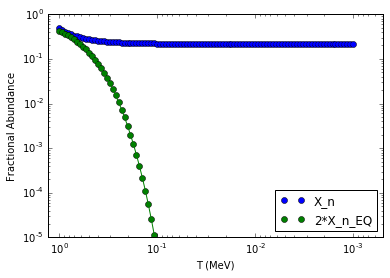

In [3]:
mn= 939.566 # MeV
mp= 938.272 #MeV
neutronAbundance(mp, mn, [0.5], 0)